___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 1 = normal; 2 = fixed defect; 3 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [395]:
df0 = pd.read_csv("heart.csv")
df = df0.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


# EDA

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [397]:
df.shape

(303, 14)

In [398]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [399]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [400]:
# Check for Duplicated Values
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [401]:
df[df.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.000,2,4,2,1


In [402]:
df.drop_duplicates(inplace=True)

In [403]:
df.shape

(302, 14)

In [404]:
# no missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

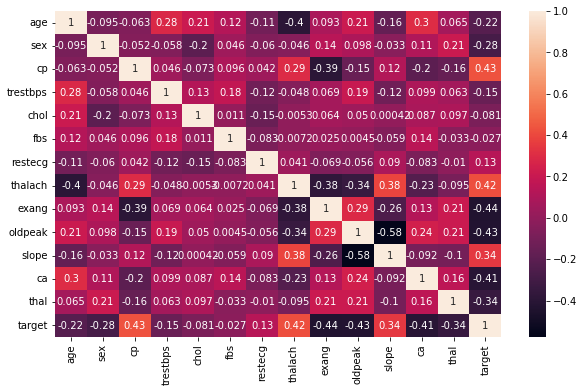

In [405]:
sns.heatmap(df.corr(), annot=True);

In [406]:
#  Yukaridaki verilen aciklama bilgisi ile uyusmuyor. Aciklama bilgisini degistiriyorum.
# 0 degerlerini siliyorum
df['thal'].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [407]:
df[df['thal'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.000,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.000,1,0,0,0


In [408]:
df.drop([48, 281],inplace =True)

In [409]:
df.shape

(300, 14)

In [410]:
df.target.value_counts()

1    163
0    137
Name: target, dtype: int64

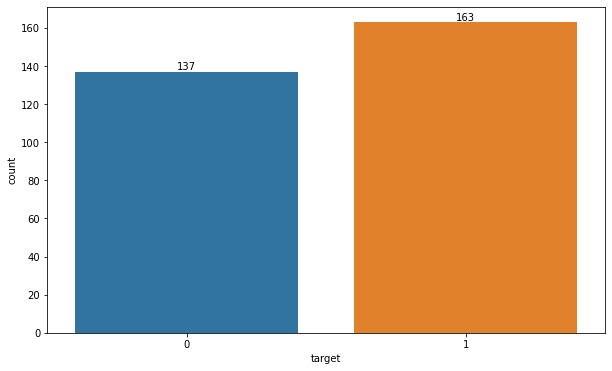

In [411]:
ax = sns.countplot(df.target)
ax.bar_label(ax.containers[0]);

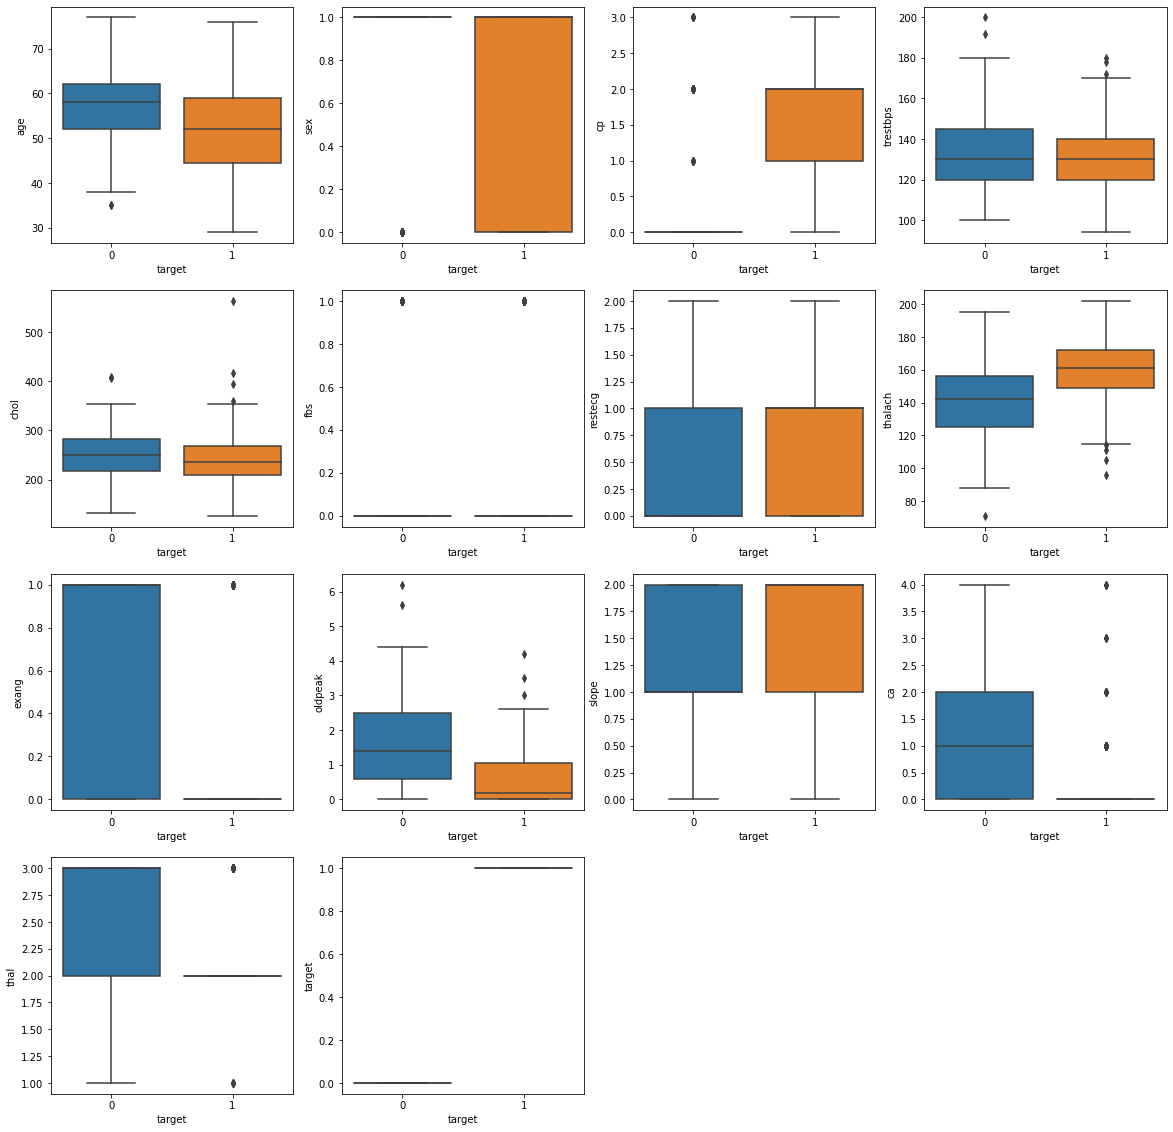

In [412]:
# Feature -Target iliskisi
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='target',y=feature, data=df)

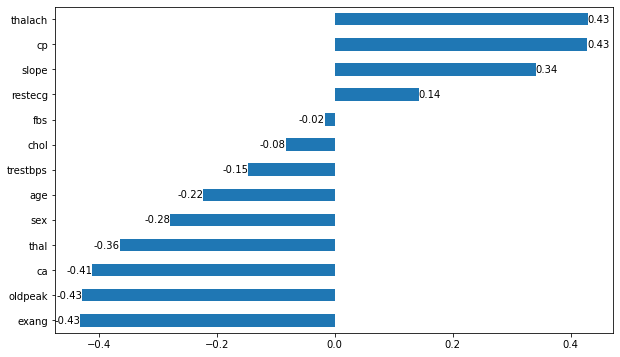

In [413]:
ax = df.corr()["target"].drop("target").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

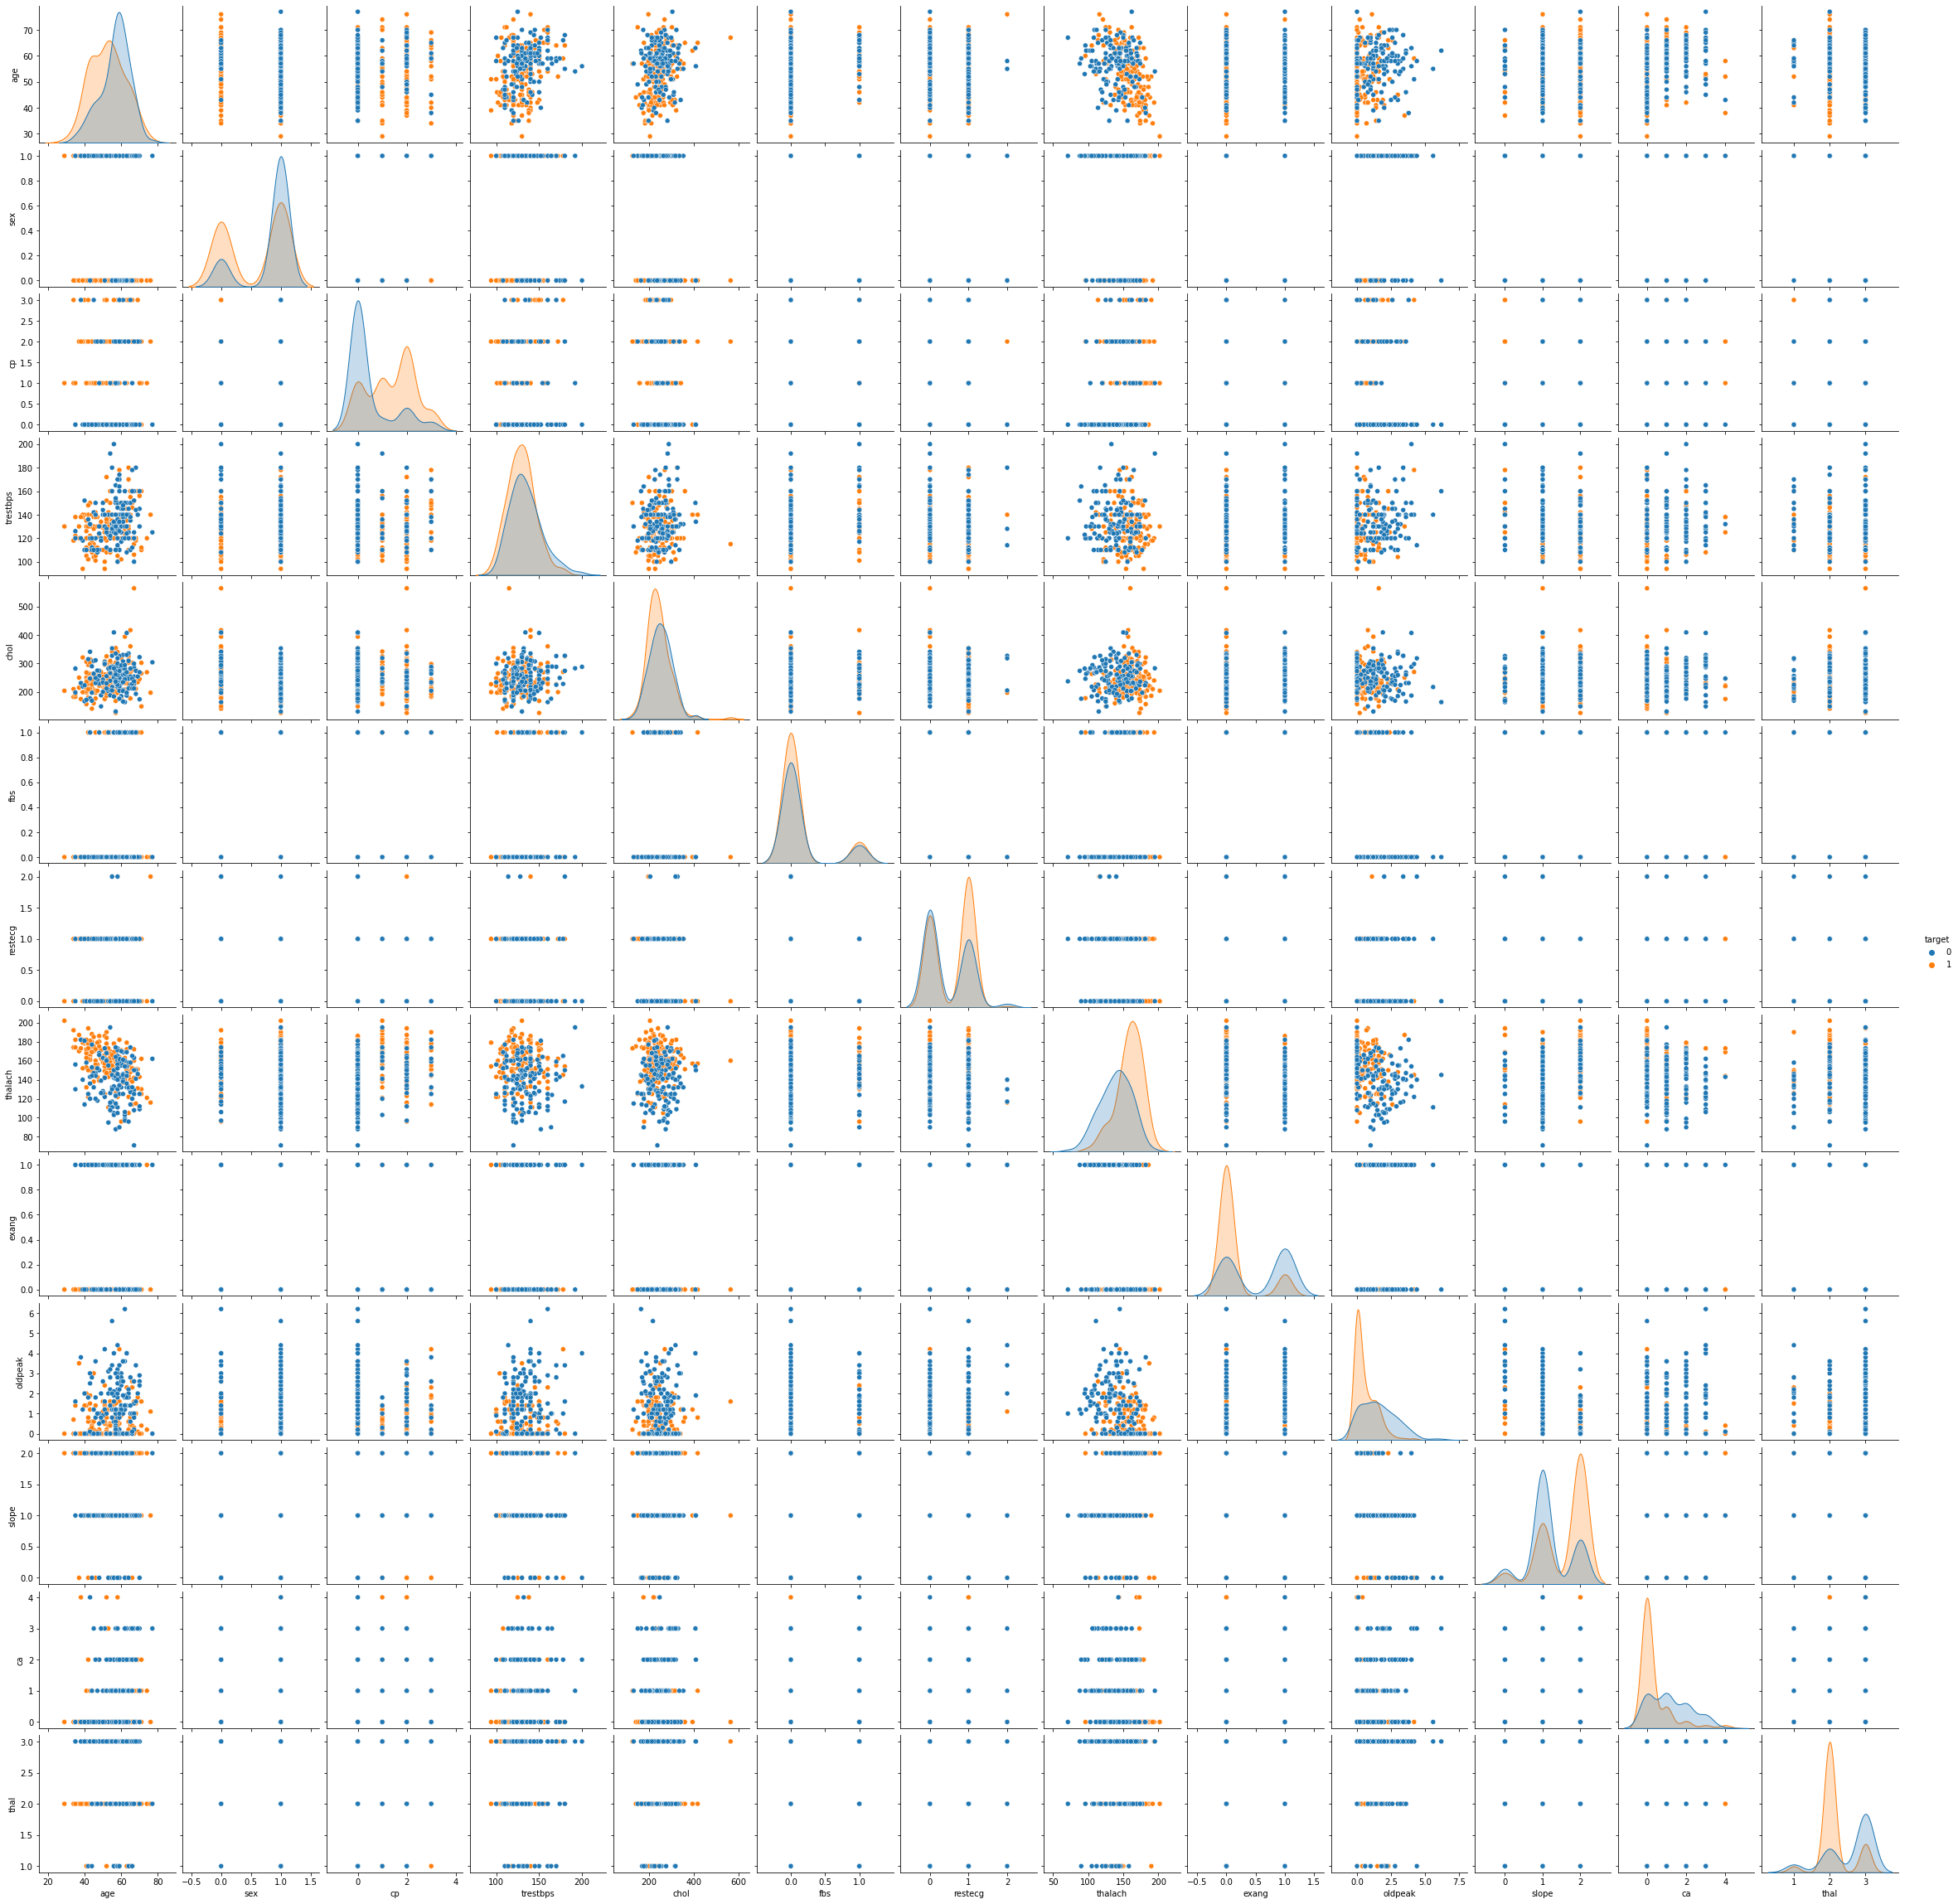

In [414]:
sns.pairplot(df, hue = "target")

# Data Preprocessing

In [415]:
X = df.drop("target", axis=1)
y = df["target"]

In [416]:
from sklearn.model_selection import train_test_split

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [418]:
from sklearn.preprocessing import MinMaxScaler

In [419]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [420]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [421]:
from sklearn.linear_model import LogisticRegression

In [422]:
log_model = LogisticRegression()


In [423]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [424]:
y_test_pred=log_model.predict(X_test_scaled)

In [425]:
y_test_pred_proba = log_model.predict_proba(X_test_scaled)

In [426]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_test_pred
test_data["pred_proba"] = y_test_pred_proba[:,1]
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
184,50,1,0,150,243,0,0,128,0,2.600,1,0,3,0,0,0.171
182,61,0,0,130,330,0,0,169,0,0.000,2,0,2,0,1,0.891
217,63,1,0,130,330,1,0,132,1,1.800,2,3,3,0,0,0.032
61,54,1,1,108,309,0,1,156,0,0.000,2,0,3,1,1,0.703
252,62,0,0,138,294,1,1,106,0,1.900,1,3,2,0,0,0.277
74,43,0,2,122,213,0,1,165,0,0.200,1,0,2,1,1,0.957
289,55,0,0,128,205,0,2,130,1,2.000,1,1,3,0,0,0.264
24,40,1,3,140,199,0,1,178,1,1.400,2,0,3,1,1,0.717
33,54,1,2,125,273,0,0,152,0,0.500,0,1,2,1,0,0.470
241,59,0,0,174,249,0,1,143,1,0.000,1,0,2,0,1,0.588


In [427]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [428]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [429]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[24  5]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.83      0.81      0.82        31

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60


Train_Set
[[ 84  24]
 [ 11 121]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       108
           1       0.83      0.92      0.87       132

    accuracy                           0.85       240
   macro avg       0.86      0.85      0.85       240
weighted avg       0.86      0.85      0.85       240



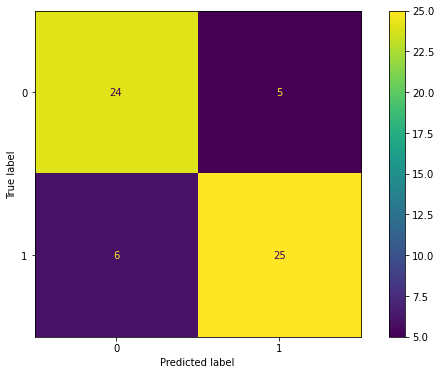

In [430]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

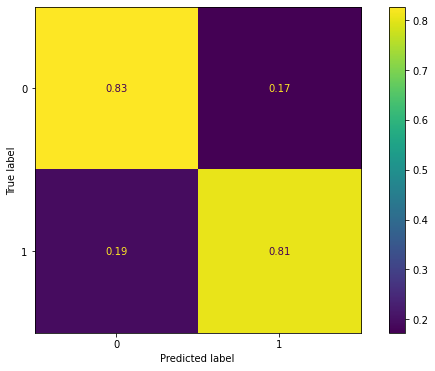

In [431]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');


In [432]:
#Cross Validate
from sklearn.model_selection import cross_validate

In [433]:
model = LogisticRegression()
model

LogisticRegression()

In [434]:
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
#df_scores
df_scores.mean()[2:]

test_accuracy    0.821
test_precision   0.813
test_recall      0.887
test_f1          0.845
dtype: float64

In [435]:
log_model_GridSearch = LogisticRegression(solver='saga', max_iter=5000)

In [436]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [437]:
grid_model = GridSearchCV(log_model_GridSearch, param_grid = param_grid)

In [438]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [439]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.5789473684210527, 'penalty': 'elasticnet'}

In [440]:
y_test_pred = grid_model.predict(X_test_scaled)
y_test_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

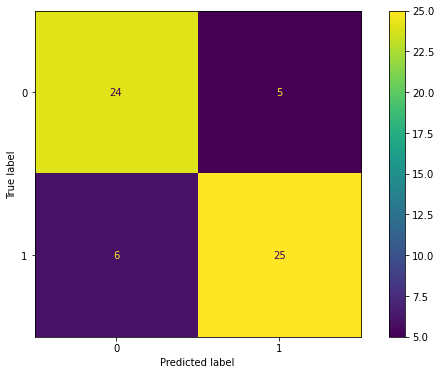

In [441]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)

In [442]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[24  5]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.83      0.81      0.82        31

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



In [443]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve


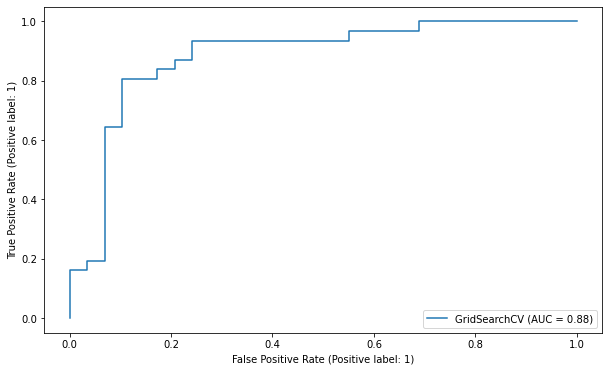

In [444]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

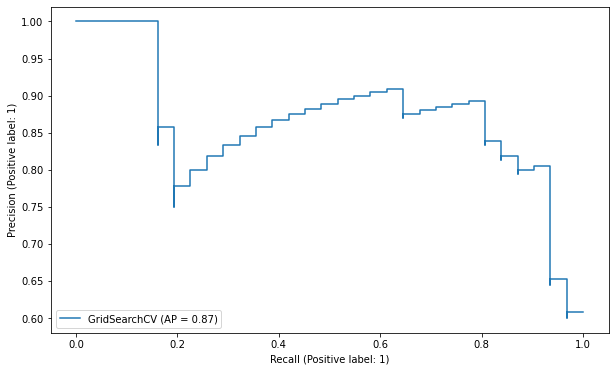

In [445]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

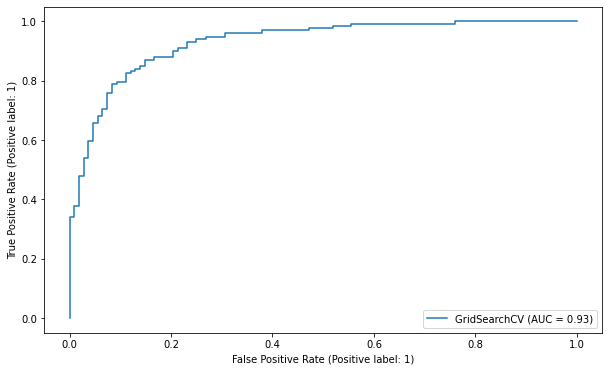

In [446]:
plot_roc_curve(grid_model, X_train_scaled, y_train);

In [447]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9298540965207632

In [448]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [449]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5868598306883863

In [450]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
205,52,1,0,128,255,0,1,161,1,0.000,2,1,3,0,0,0.223
268,54,1,0,122,286,0,0,116,1,3.200,1,2,2,0,0,0.038
153,66,0,2,146,278,0,0,152,0,0.000,1,1,2,1,1,0.848
9,57,1,2,150,168,0,1,174,0,1.600,2,0,2,1,1,0.854
235,51,1,0,140,299,0,1,173,1,1.600,2,0,3,0,0,0.269


In [451]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)

In [452]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba,pred2
205,52,1,0,128,255,0,1,161,1,0.000,2,1,3,0,0,0.223,0
268,54,1,0,122,286,0,0,116,1,3.200,1,2,2,0,0,0.038,0
153,66,0,2,146,278,0,0,152,0,0.000,1,1,2,1,1,0.848,1
9,57,1,2,150,168,0,1,174,0,1.600,2,0,2,1,1,0.854,1
235,51,1,0,140,299,0,1,173,1,1.600,2,0,3,0,0,0.269,0


In [453]:
y_test_pred2 = test_data["pred2"]

In [454]:
print(confusion_matrix(y_test,y_test_pred2))
print(classification_report(y_test,y_test_pred2))

[[24  5]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.83      0.81      0.82        31

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



In [455]:
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[24  5]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.83      0.81      0.82        31

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



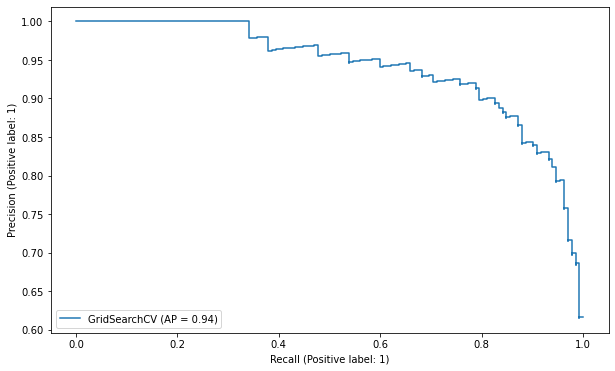

In [456]:
plot_precision_recall_curve(grid_model, X_train_scaled, y_train);

In [457]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.94110344383811

In [458]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [459]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  # harmonic mean
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4818915553704888

In [460]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba,pred2
205,52,1,0,128,255,0,1,161,1,0.000,2,1,3,0,0,0.223,0
268,54,1,0,122,286,0,0,116,1,3.200,1,2,2,0,0,0.038,0
153,66,0,2,146,278,0,0,152,0,0.000,1,1,2,1,1,0.848,1
9,57,1,2,150,168,0,1,174,0,1.600,2,0,2,1,1,0.854,1
235,51,1,0,140,299,0,1,173,1,1.600,2,0,3,0,0,0.269,0


In [461]:
test_data["pred3"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)

In [462]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba,pred2,pred3
205,52,1,0,128,255,0,1,161,1,0.000,2,1,3,0,0,0.223,0,0
268,54,1,0,122,286,0,0,116,1,3.200,1,2,2,0,0,0.038,0,0
153,66,0,2,146,278,0,0,152,0,0.000,1,1,2,1,1,0.848,1,1
9,57,1,2,150,168,0,1,174,0,1.600,2,0,2,1,1,0.854,1,1
235,51,1,0,140,299,0,1,173,1,1.600,2,0,3,0,0,0.269,0,0


In [463]:
y_test_pred3 = test_data["pred3"]

In [464]:
print(confusion_matrix(y_test,y_test_pred3))
print(classification_report(y_test,y_test_pred3))

[[24  5]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.83      0.81      0.82        31

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



# Implement KNN and Evaluate

In [465]:
X = df.drop("target", axis=1)
y = df["target"]

In [466]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [467]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [468]:
scaler = MinMaxScaler()

In [469]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [470]:
from sklearn.neighbors import KNeighborsClassifier

In [471]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

In [472]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [473]:
y_test_pred = knn_model.predict(scaled_X_test)
y_test_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [474]:
y_test_pred_proba = knn_model.predict_proba(scaled_X_test)
y_test_pred_proba

array([[0.6, 0.4],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.6, 0.4],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6,

In [475]:
pd.DataFrame(y_test_pred_proba)

,0,1
0,0.600,0.400
1,1.000,0.000
2,0.200,0.800
3,0.000,1.000
4,1.000,0.000
5,0.400,0.600
6,0.800,0.200
7,0.600,0.400
8,0.200,0.800
9,0.200,0.800


In [476]:
my_dict = {"Actual": y_test, "Pred":y_test_pred, "Proba_1":y_test_pred_proba[:,1], "Proba_0":y_test_pred_proba[:,0]}

In [477]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
268,0,0,0.000,1.000
114,1,1,1.000,0.000
300,0,1,0.600,0.400
289,0,0,0.000,1.000
46,1,1,1.000,0.000
58,1,1,1.000,0.000
5,1,1,0.800,0.200
98,1,1,0.800,0.200
61,1,1,0.600,0.400
112,1,1,0.800,0.200


In [478]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [479]:
confusion_matrix(y_test, y_test_pred)

array([[23,  6],
       [ 6, 25]], dtype=int64)

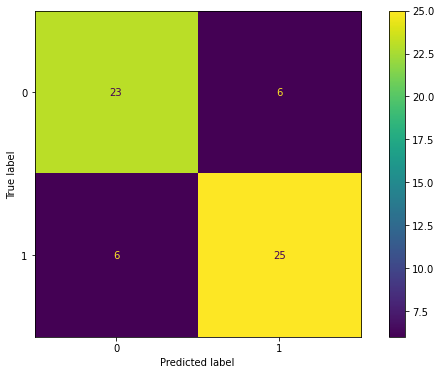

In [480]:
plot_confusion_matrix(knn_model, scaled_X_test, y_test);

In [481]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[23  6]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        31

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



In [482]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [483]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_test_pred = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_test_pred)
    test_error_rates.append(test_error)
    print("k=", k, "for error_rate:", test_error)

k= 1 for error_rate: 0.23333333333333328
k= 2 for error_rate: 0.23333333333333328
k= 3 for error_rate: 0.21666666666666667
k= 4 for error_rate: 0.19999999999999996
k= 5 for error_rate: 0.19999999999999996
k= 6 for error_rate: 0.19999999999999996
k= 7 for error_rate: 0.18333333333333335
k= 8 for error_rate: 0.16666666666666663
k= 9 for error_rate: 0.18333333333333335
k= 10 for error_rate: 0.23333333333333328
k= 11 for error_rate: 0.18333333333333335
k= 12 for error_rate: 0.18333333333333335
k= 13 for error_rate: 0.21666666666666667
k= 14 for error_rate: 0.19999999999999996
k= 15 for error_rate: 0.18333333333333335
k= 16 for error_rate: 0.18333333333333335
k= 17 for error_rate: 0.21666666666666667
k= 18 for error_rate: 0.19999999999999996
k= 19 for error_rate: 0.21666666666666667
k= 20 for error_rate: 0.19999999999999996
k= 21 for error_rate: 0.23333333333333328
k= 22 for error_rate: 0.23333333333333328
k= 23 for error_rate: 0.2666666666666667
k= 24 for error_rate: 0.23333333333333328
k=

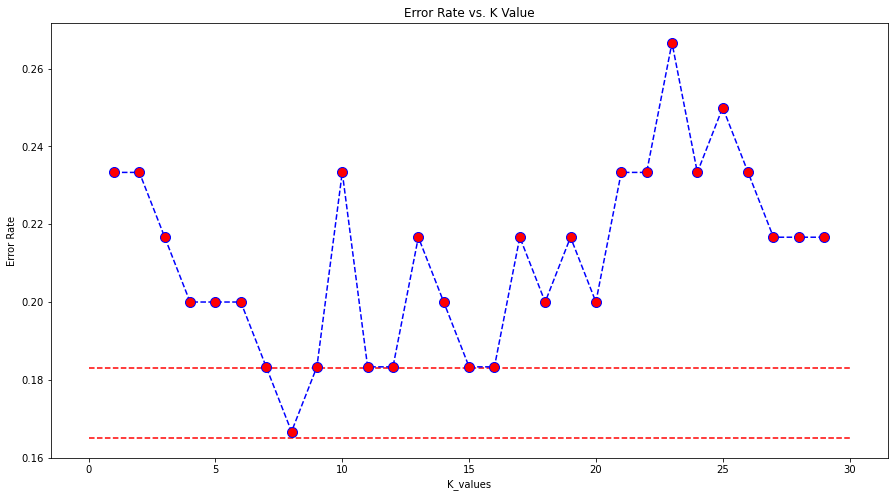

In [484]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.183, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.165, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [485]:
# Overfittinf and underfitting control for k values

test_error_rates = []
train_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

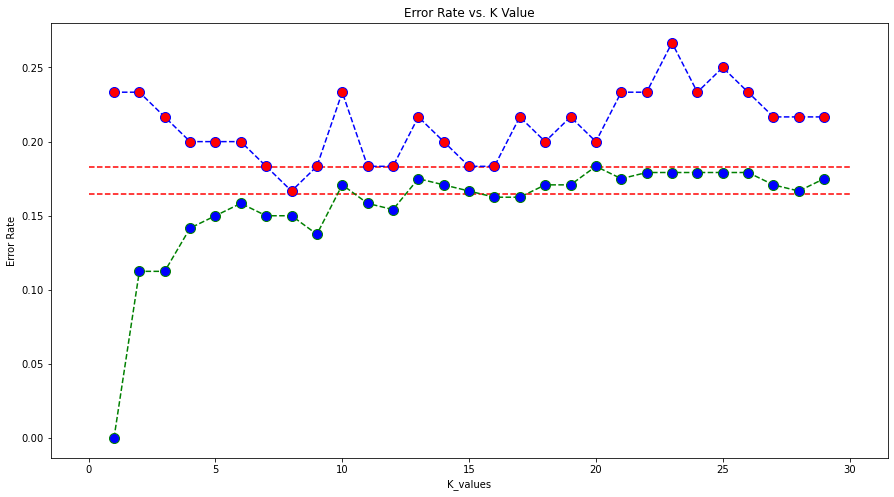

In [486]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.183, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.165, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [487]:
# scores by value of k = 9
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=9


[[24  5]
 [ 6 25]]


              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.83      0.81      0.82        31

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



In [488]:
#gridsearch method for choosing reasonable k values

In [489]:
from sklearn.model_selection import GridSearchCV


In [490]:
knn_grid = KNeighborsClassifier()

In [491]:
k_values= range(1,30)

In [492]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [493]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [494]:
knn_grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [495]:
k_best = GridSearchCV(knn, {"n_neighbors": np.arange(1,30,1)}, cv = 10).\
                      fit(X_train, y_train).best_params_["n_neighbors"]
    
knn_tuned = KNeighborsRegressor(n_neighbors = k_best).fit(X_train, y_train)
print(k_best)
print(knn_tuned.metric)
y_test_pred = knn_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_pred))

21
minkowski


0.4549633892557885

In [496]:
knn_grid_model.best_params_

{'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}

In [497]:
# evaluating ROC Curves and AUC
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [498]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train) #yukarda buldugum en iyi k degerini fit ediyorum.

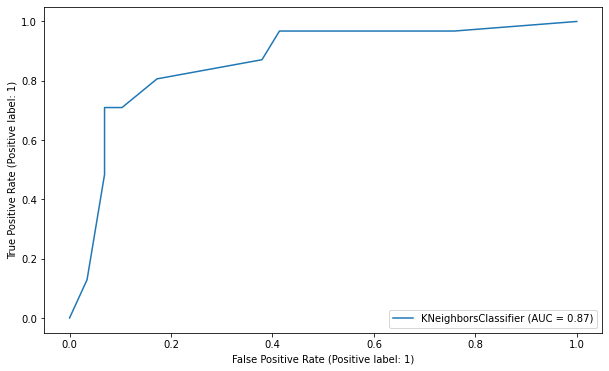

In [499]:
plot_roc_curve(knn_model, X_test_scaled, y_test);

In [500]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8659621802002225

# Visually compare models based on your chosen metric

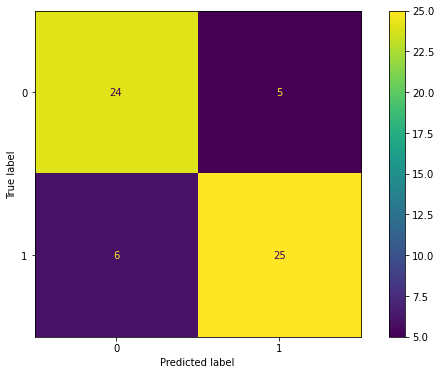

In [501]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);
# bu ilk yaptığımız ilkel logistic Regression modeline ait.

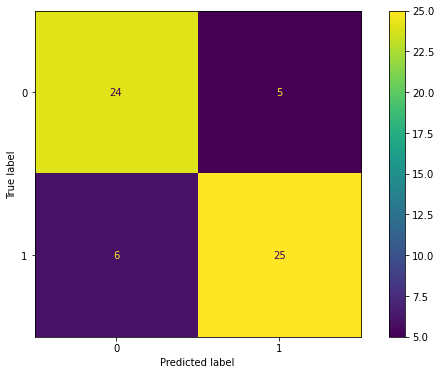

In [502]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

# bu, log_model'in GridSearch yapılarak geliştirilmiş haline ait.
# parametreler ile geliştirmemize rağmen değerlerin aynı olduğunu görüyoruz. 

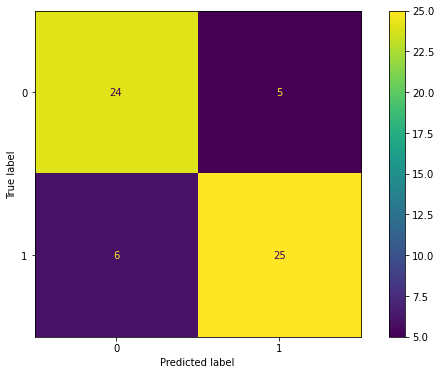

In [503]:
plot_confusion_matrix(knn, X_test_scaled, y_test);

# Chose best model and make a random prediction 

In [504]:
y_test_pred = knn.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# bu modelin skorları en yüksek olduğu için best model olarak knn'yi seçiyorum.

[[24  5]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.83      0.81      0.82        31

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



In [505]:
# final

In [506]:
import pickle

In [507]:
scaler = MinMaxScaler()

In [508]:
scaler.fit(X)

MinMaxScaler()

In [509]:
X_scaled = scaler.transform(X)

In [510]:
final_knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_scaled,y)

In [511]:
pickle.dump(final_knn_model, open('knn_final.pkl', 'wb'))

In [512]:
pickle.dump(scaler, open('scaler_knn.pkl', 'wb'))

In [513]:
loaded_scaler = pickle.load(open('scaler_knn.pkl', 'rb'))

In [514]:
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

In [515]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [516]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,300.000,300.000,300.000,300.000,300.000,300.000,300.000,300.000,300.000,300.000,300.000,300.000,300.000
mean,54.433,0.683,0.963,131.627,246.743,0.147,0.527,149.663,0.327,1.047,1.397,0.723,2.330
std,9.077,0.466,1.032,17.620,51.838,0.354,0.526,22.890,0.470,1.164,0.617,1.008,0.585
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,1.000
25%,47.750,0.000,0.000,120.000,211.000,0.000,0.000,133.750,0.000,0.000,1.000,0.000,2.000
50%,56.000,1.000,1.000,130.000,241.500,0.000,1.000,152.500,0.000,0.800,1.000,0.000,2.000
75%,61.000,1.000,2.000,140.000,275.000,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000


In [517]:
new_obs = {"age" : [35, 42, 45,56,75], "sex" :[0,1,0,1,1], 'cp' :[1,2,3,1,2], 'trestbps':[105,150,120,160,180],
          "chol":[200, 350,400,290,500],"fbs":[0,1,0,1,1],"restecg":[0,2,1,2,0],"thalach":[100,115,160,180,200],
           "exang":[0,1,1,0,1], "oldpeak":[0, 1.6, 3,1.2,1.4],"slope":[0,1,2,2,1], "ca":[0,1,2,3,4],
          "thal":[1,2,3,3,1]}

In [518]:
samples = pd.DataFrame(new_obs)
samples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,35,0,1,105,200,0,0,100,0,0.000,0,0,1
1,42,1,2,150,350,1,2,115,1,1.600,1,1,2
2,45,0,3,120,400,0,1,160,1,3.000,2,2,3
3,56,1,1,160,290,1,2,180,0,1.200,2,3,3
4,75,1,2,180,500,1,0,200,1,1.400,1,4,1


In [519]:
samples_scaled = loaded_scaler.transform(samples) 
samples_scaled

array([[0.125     , 0.        , 0.33333333, 0.10377358, 0.16894977,
        0.        , 0.        , 0.22137405, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.27083333, 1.        , 0.66666667, 0.52830189, 0.51141553,
        1.        , 1.        , 0.33587786, 1.        , 0.25806452,
        0.5       , 0.25      , 0.5       ],
       [0.33333333, 0.        , 1.        , 0.24528302, 0.62557078,
        0.        , 0.5       , 0.67938931, 1.        , 0.48387097,
        1.        , 0.5       , 1.        ],
       [0.5625    , 1.        , 0.33333333, 0.62264151, 0.37442922,
        1.        , 1.        , 0.83206107, 0.        , 0.19354839,
        1.        , 0.75      , 1.        ],
       [0.95833333, 1.        , 0.66666667, 0.81132075, 0.85388128,
        1.        , 0.        , 0.98473282, 1.        , 0.22580645,
        0.5       , 1.        , 0.        ]])

In [520]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [521]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred,pred_proba_1,pred_proba_0
0,35,0,1,105,200,0,0,100,0,0.000,0,0,1,1,1.000,0.000
1,42,1,2,150,350,1,2,115,1,1.600,1,1,2,0,0.333,0.667
2,45,0,3,120,400,0,1,160,1,3.000,2,2,3,1,0.667,0.333
3,56,1,1,160,290,1,2,180,0,1.200,2,3,3,1,0.778,0.222
4,75,1,2,180,500,1,0,200,1,1.400,1,4,1,0,0.222,0.778


In [522]:
# with pipeline

In [523]:
from sklearn.pipeline import Pipeline

In [524]:
operations = [("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())]

In [525]:
Pipeline(steps=operations)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [526]:
pipe_model = Pipeline(steps=operations)

In [527]:
pipe_model.fit(X_train, y_train) 

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [528]:
y_pred = pipe_model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [529]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

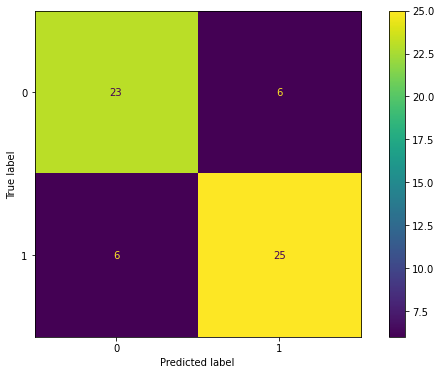

In [530]:
plot_confusion_matrix(pipe_model, X_test, y_test);

In [531]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[23  6]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        31

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60


Train_Set
[[ 89  19]
 [ 17 115]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       108
           1       0.86      0.87      0.86       132

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240



In [532]:
#changing the parameters of the pipe_model
pipe_model.get_params() 

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [533]:
pipe_model.set_params(knn__n_neighbors= 9)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [534]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=9))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'knn': KNeighborsClassifier(n_neighbors=9),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 9,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [535]:
pipe_model['scaler']

MinMaxScaler()

In [536]:
pipe_model["knn"]

KNeighborsClassifier(n_neighbors=9)

In [537]:
#gridsearch on pipeline

In [538]:
from sklearn.model_selection import GridSearchCV

In [539]:
param_grid = {'knn__n_neighbors': range(1,30)} 
pipe_model = Pipeline(steps=operations)

In [540]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= 'accuracy')

In [541]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=9))]),
             param_grid={'knn__n_neighbors': range(1, 30)}, scoring='accuracy')

In [542]:
pipe_grid.best_params_ 

{'knn__n_neighbors': 23}

In [543]:
#CV on Pipeline

In [544]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9))]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.799
test_recall      0.880
test_f1          0.834
test_accuracy    0.808
dtype: float64

In [545]:
#final pipe_model

In [546]:
operations = [('scaler',MinMaxScaler()),('knn',KNeighborsClassifier(n_neighbors=9))]

In [547]:
pipe_final = Pipeline(operations)

In [548]:
pipe_final.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [549]:
#predict new observations with pipe_model

In [550]:
new_obs = {"age" : [35, 42, 45,56,75], "sex" :[0,1,0,1,1], 'cp' :[1,2,3,1,2], 'trestbps':[105,150,120,160,180],
          "chol":[200, 350,400,290,500],"fbs":[0,1,0,1,1],"restecg":[0,2,1,2,0],"thalach":[100,115,160,180,200],
           "exang":[0,1,1,0,1], "oldpeak":[0, 1.6, 3,1.2,1.4],"slope":[0,1,2,2,1], "ca":[0,1,2,3,4],
          "thal":[1,2,3,3,1]}

samples = pd.DataFrame(new_obs)
samples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,35,0,1,105,200,0,0,100,0,0.000,0,0,1
1,42,1,2,150,350,1,2,115,1,1.600,1,1,2
2,45,0,3,120,400,0,1,160,1,3.000,2,2,3
3,56,1,1,160,290,1,2,180,0,1.200,2,3,3
4,75,1,2,180,500,1,0,200,1,1.400,1,4,1


In [551]:
predictions = pipe_final.predict(samples)
predictions

array([1, 0, 1, 1, 0], dtype=int64)

In [552]:
predictions_proba = pipe_final.predict_proba(samples)
predictions_proba

array([[0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.22222222, 0.77777778],
       [0.77777778, 0.22222222]])

In [553]:
samples["pred"] = predictions
samples["pred_proba"] = predictions_proba[:,1]
samples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred,pred_proba
0,35,0,1,105,200,0,0,100,0,0.000,0,0,1,1,1.000
1,42,1,2,150,350,1,2,115,1,1.600,1,1,2,0,0.333
2,45,0,3,120,400,0,1,160,1,3.000,2,2,3,1,0.667
3,56,1,1,160,290,1,2,180,0,1.200,2,3,3,1,0.778
4,75,1,2,180,500,1,0,200,1,1.400,1,4,1,0,0.222
